# MIXTURE MODELS

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from reliability.Fitters import Fit_Weibull_Mixture
from reliability.Distributions import Lognormal_Distribution, Gamma_Distribution, Weibull_Distribution, Mixture_Model
from reliability.Other_functions import histogram

In [4]:
# Create a mixture model
d1 = Lognormal_Distribution(mu = 2, sigma = 0.8)
d2 = Weibull_Distribution(alpha = 50, beta = 5, gamma = 100)
d3 = Gamma_Distribution(alpha = 5, beta = 3, gamma = 30)

mixture_model = Mixture_Model(
    distributions = [d1, d2, d3],
    proportions = [0.3, 0.4, 0.3]
)

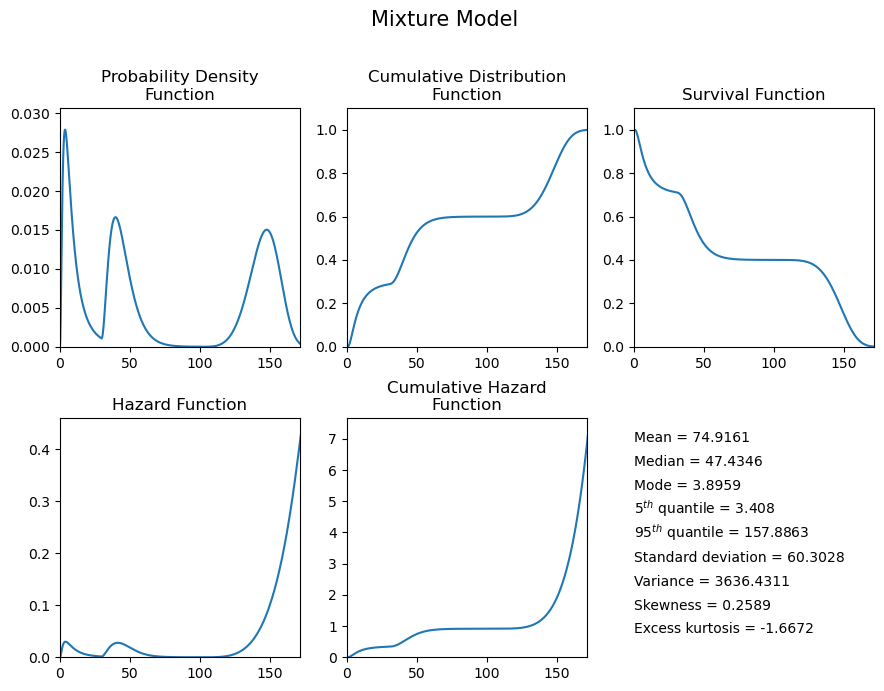

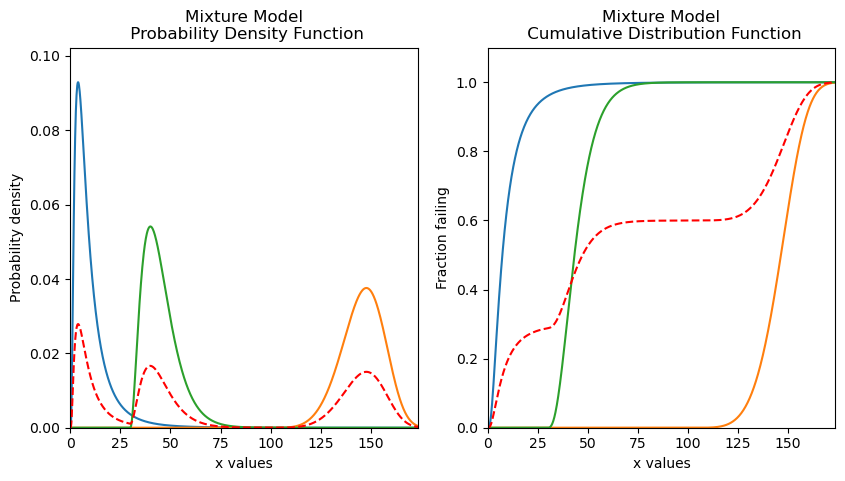

In [6]:
mixture_model.plot()
# plot the PDF and CDF
plot_components = True # this plots the component distributions. Default is False
plt.figure(figsize=(9, 5))
plt.subplot(121)
mixture_model.PDF(plot_components=plot_components, color='red', linestyle='--')
plt.subplot(122)
mixture_model.CDF(plot_components=plot_components, color='red', linestyle='--')
plt.subplots_adjust(left=0.1, right=0.95)
plt.show()

In [7]:
# extract the mean of the distribution
print('The mean of the distribution is:', mixture_model.mean)

The mean of the distribution is: 74.91607709895403


## Example 2

In [9]:
group_1 = Weibull_Distribution(alpha = 10, beta = 3).random_samples(40, seed = 2)
group_2 = Weibull_Distribution(alpha=40, beta=4).random_samples(60, seed=2)

all_data = np.hstack([group_1, group_2])

Results from Fit_Weibull_Mixture (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 100/0 (0% right censored) 

   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
     Alpha 1         8.65511        0.393835   7.91662   9.46248
      Beta 1         3.91197        0.509776   3.03021    5.0503
     Alpha 2         38.1102         1.41075   35.4431   40.9781
      Beta 2         3.82192        0.421385   3.07916   4.74385
Proportion 1        0.388491       0.0502663  0.295595  0.490263 

Goodness of fit    Value
 Log-likelihood -375.991
           AICc  762.619
            BIC  775.007
             AD 0.418649 



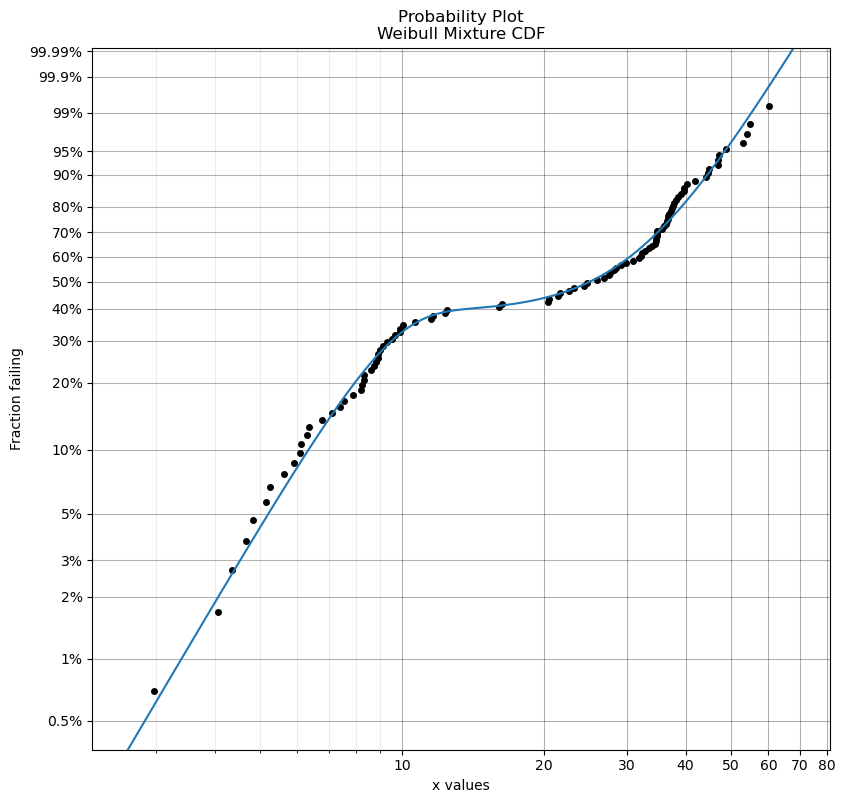

In [10]:
results = Fit_Weibull_Mixture(failures = all_data)

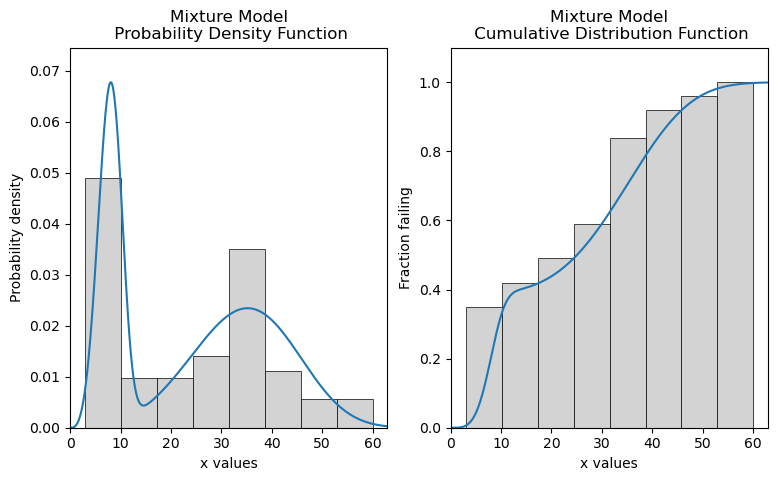

In [11]:
plt.figure(figsize=(9, 5))
plt.subplot(121)
histogram(all_data)
results.distribution.PDF()
plt.subplot(122)
histogram(all_data, cumulative=True)
results.distribution.CDF()

plt.show()